In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
np.set_printoptions(threshold=np.inf)  #使输出数据完整显示

src_dir='/home/zhaobenyan/repos/patchV1/src/'
patchfast='/home/zhaobenyan/dataset/patchfast/'

In [2]:
#将minimal.cfg中的替死鬼文件中的数据换成实验输入的，dir:grating所在地址 
def replace(dir):
    '''
    dir:grating所在地址
    '''
    with open(dir) as f:
        x_1 = np.fromfile(f, 'i4', 1)
        x_2 = np.fromfile(f, 'i4', 3)
        nFrame=x_2[0]
        size=x_2[1]
        x_3 = np.fromfile(f, 'f4', 3)
        x_4 = np.fromfile(f, 'f4', 2)
        x_5 = np.fromfile(f, 'u4', 1)
        x_6 = np.fromfile(f, 'f4', nFrame*size*size*3)
        #写文件,'wb'表示覆盖写文件 f1打开“替死鬼”文件地址
        #f1读取的替死鬼文件的地址要修改,该文件必须放在/resource下面,与minimal.cfg文件里面fStimulus=一致
        f1 = open('/home/zhaobenyan/dataset/resource/static_color-grid_{}.bin'.format(size), 'wb') 
        np.array(x_1).astype('i4').tofile(f1) 
        np.array((x_2[0],size,size), dtype='i4').tofile(f1)
        x_3.astype('f4').tofile(f1) # init_luminance
        np.array(x_4, dtype='f4').tofile(f1)
        np.array(x_5).astype('u4').tofile(f1)
        np.array(x_6).astype('f4').tofile(f1)
        f1.close() #记得要关文件

In [3]:
#运行minimalTC
def minimalTC():
   os.system(f'cd {src_dir} && ./minimalTC')
def patch():
   os.system(f'cd {patchfast} && patch_fast -c {src_dir}minimal.cfg') 

In [2]:
#读取fr
def read_spike(file):
    with open(file) as f:
        sampleSize = np.fromfile(f, 'u4', 1)[0] #一共5120
        sample_t0, sample_t1 = np.fromfile(f, 'f4', 2)#t0是开始时间，t1是结束时间，我一共跑了1s
        nt = np.fromfile(f, 'u4', 1)[0]
        nLGN = np.fromfile(f, 'u4', 1)[0]
        LGN_spike_time = np.fromfile(f, 'u4', nLGN*nt)
        sampleID = np.fromfile(f, 'u4', sampleSize)#id排序是顺序的
        sample_spikeCount = np.fromfile(f, 'u4', sampleSize)
        fr = sample_spikeCount/(sample_t1-sample_t0)*1000
    LGN_spike_time = LGN_spike_time.reshape((nt,nLGN)).T
    return LGN_spike_time,fr


In [3]:
#读取grating的数据  file:文件路径 static_color-grid_{}.bin类型的文件
def read_grating_bin(file):
    with open(file) as f:
        x_1 = np.fromfile(f, 'i4', 1)
        x_2 = np.fromfile(f, 'i4', 3)
        nFrame=x_2[0]
        size=x_2[1]
        x_3 = np.fromfile(f, 'f4', 3)
        x_4 = np.fromfile(f, 'f4', 2)
        x_5 = np.fromfile(f, 'u4', 1)
        x_6 = np.fromfile(f, 'f4', nFrame*size*size*3)
    #return nFrame,size
    return x_1,x_2,x_3,x_4,x_5,x_6

In [4]:
#实验测试 file:输入图片
def experiment(file):
    replace(file)
    minimalTC()
    # patch()

In [5]:
#读取grating的数据  file:文件路径 static_color-grid_{}_cfg.bin类型的文件
def read_grating_cfg(file):
    with open(file) as f: #可以去查查with是干嘛的，它是以防你忘记关掉文件，这种表达会比较好
        sf = np.fromfile(f,'f4',1)[0] #为啥是np.fromfile（。。。）[0],因为用np命令的读出来是array，其实我们只是要他的元素
        ori = np.fromfile(f,'f4',1)[0] 
        phase = np.fromfile(f,'f4',1)[0]
        contrast = np.fromfile(f,'f4',1)[0] #一般读取到contrast就停了
        #crest = np.fromfile(f,'f4',3)  #波峰
        #valley = np.fromfile(f,'f4',3) #波谷
    return sf, ori, phase, contrast

In [8]:
file='/home/zhaobenyan/dataset/grating/grating_32x32_frameRate1_phase=pi/static_color-grid_8.bin'
experiment(file)

repeat_test
overwrite contents in /home/zhaobenyan/dataset/repeat_test
configuration files copied
one_ori=1
plotting files copied


In [17]:
sf, ori, phase, contrast=read_grating_cfg('/home/zhaobenyan/dataset/grating/grating_32x32_frameRate1_phase=pi/static_color-grid_3_cfg.bin')
print(sf, ori, phase,contrast)

24.0 30.0 180.0 0.15


In [18]:
x_1,x_2,x_3,x_4,x_5,x_6=read_grating_bin('/home/zhaobenyan/dataset/grating/grating_32x32_frameRate1_phase=pi/static_color-grid_3.bin')
print(x_6.shape)

(3072,)


In [19]:
x=x_6#[:2048]

In [20]:
c=(np.max(x)-np.mean(x))/np.mean(x)
print(c)

0.29999995


(array([1.757e+03, 5.000e+02, 2.500e+02, 2.070e+02, 1.450e+02, 1.210e+02,
        1.010e+02, 8.300e+01, 6.800e+01, 7.900e+01, 6.500e+01, 6.300e+01,
        4.500e+01, 3.800e+01, 3.900e+01, 3.500e+01, 2.400e+01, 1.900e+01,
        2.500e+01, 1.900e+01, 1.900e+01, 1.800e+01, 1.500e+01, 1.100e+01,
        8.000e+00, 5.000e+00, 9.000e+00, 6.000e+00, 6.000e+00, 7.000e+00,
        3.000e+00, 7.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 3.000e+00,
        2.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 5.000e+00, 3.000e+00,
        1.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <BarContainer object of 49 artists>)

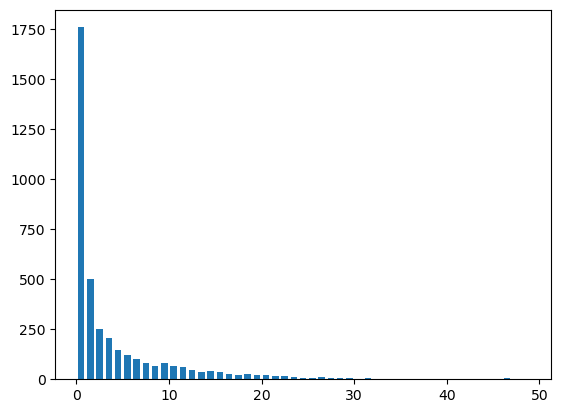

In [10]:
LGN_spike_time,fr=read_spike('/home/zhaobenyan/dataset/patchfast/sample_spikeCount_test_1.bin')
plt.hist(fr,bins=np.arange(0,50,1),rwidth=0.7)

In [14]:
#lgn=np.array(LGN_spike_time)
lgn=LGN_spike_time
print(lgn.shape)
print(len(lgn[0]))
ar,num=np.unique(lgn,return_counts=True)
# #print(LGN_spike_time[0])
print(ar[1:])
print([num[0],np.sum(num[1:])])

(512, 16000)
16000
[1 2 3 4]
[7910110, 281890]


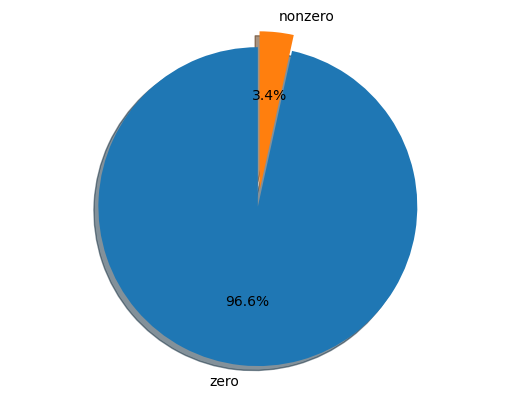

In [15]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#labels = '0', '1', '2', '3','4'
explode = (0, 0.1)  # only "explode" the 1st slice (i.e. '0')
numbers=[num[0],np.sum(num[1:])]
labels=['zero','nonzero']
fig1, ax1 = plt.subplots()
ax1.pie(numbers, labels=labels,explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('lgn_spike.jpg')
plt.show()

In [2]:
#读取输出
def read_output(file_name):
    output=os.path.basename(file_name).split('.')[0].split('_')[0] #fr or lgn
    if output=='fr':
        with np.load(file_name) as f:
            fr=f['fr']
        return fr
    else :#output=='lgn'
        with np.load(file_name) as f:
            lgn=f['lgn']
        return lgn

In [13]:
fr=read_output('/home/zhaobenyan/dataset/output/grating_32x32/contrast10/fr_time5.npz')

In [14]:
print(np.array(fr).shape)

(10, 3840)


(array([543.,  95.,  68.,  63.,  65.,  68.,  70.,  80.,  76.,  94.,  74.,
         90., 104., 110.,  95., 135., 120., 121., 109., 140., 131., 119.,
        117., 136., 102., 111.,  87.,  98.,  98.,  88.,  71.,  55.,  51.,
         53.,  40.,  27.,  30.,  26.,  25.,  13.,   8.,  10.,   6.,   8.,
          2.,   2.,   3.,   0.,   2.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <BarContainer object of 49 artists>)

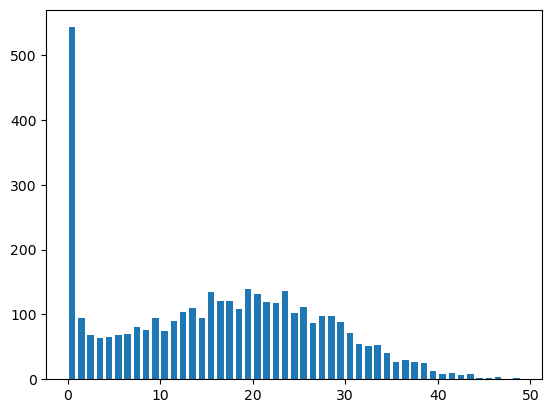

In [15]:
plt.hist(fr[0],bins=np.arange(0,50,1),rwidth=0.7)